<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

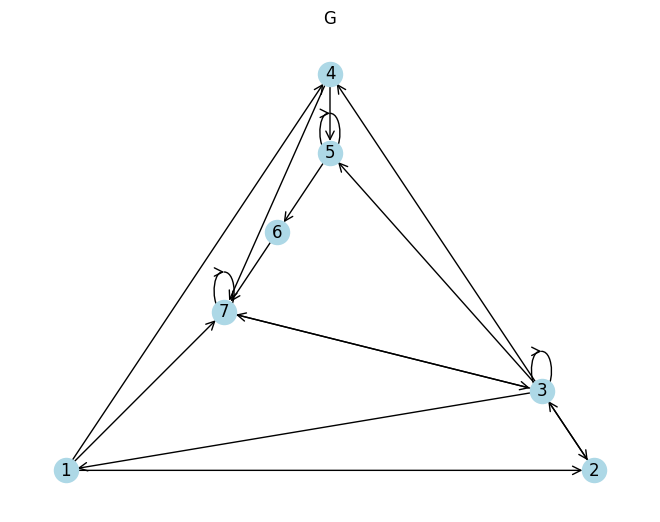

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6,7]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),(3,2),(3,5),(1,7),(7,7),(7,3),(3,7),(4,7),(6,7),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

ماتریس مجاورت گراف


In [ ]:
import numpy as np


adj_matrix = np.zeros((7, 7), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0 1]
 [0 0 1 0 0 0 0]
 [1 1 1 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 1]]


ماتریس انتقال (P)

In [ ]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((7, 7))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.33333333 0.         0.33333333 0.         0.
  0.33333333]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.5        0.
  0.5       ]
 [0.         0.         0.         0.         0.5        0.5
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.5        0.         0.         0.
  0.5       ]]


ماتریس انتقال پیج رنک

In [ ]:
import numpy as np


alpha = 0.85
n = 7


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.0214 0.3048 0.0214 0.3048 0.0214 0.0214 0.3048]
 [0.0214 0.0214 0.8714 0.0214 0.0214 0.0214 0.0214]
 [0.1631 0.1631 0.1631 0.1631 0.1631 0.0214 0.1631]
 [0.0214 0.0214 0.0214 0.0214 0.4464 0.0214 0.4464]
 [0.0214 0.0214 0.0214 0.0214 0.4464 0.4464 0.0214]
 [0.0214 0.0214 0.0214 0.0214 0.0214 0.0214 0.8714]
 [0.0214 0.0214 0.4464 0.0214 0.0214 0.0214 0.4464]]



# محاسبه مقادیر ویژه و بردارهای ویژه

In [ ]:


# محاسبه مقادیر ویژه و بردارهای ویژه
eigenvalues, eigenvectors = np.linalg.eig(P_alpha.T)

# ماتریس قطری D
D = np.diag(eigenvalues)

# ماتریس V (بردارهای ویژه به صورت ستونی)
V = eigenvectors

# معکوس V
V_inv = np.linalg.inv(V)

# بررسی صحت تجزیه: P_alpha^T ≈ V D V^{-1}
reconstructed = (V @ D @ V_inv).real

print("مقادیر ویژه:\n", np.round(eigenvalues, 4))
print("\nبردارهای ویژه (ستون‌ها):\n", np.round(V, 4))
print("\nماتریس قطری D:\n", np.round(D, 4))
print("\nبررسی صحت تجزیه (P_alpha^T ≈ V D V^{-1}):\n", np.round(reconstructed, 4))

مقادیر ویژه:
 [ 1.    +0.j      0.3297+0.302j   0.3297-0.302j  -0.1605+0.2293j
 -0.1605-0.2293j -0.1967+0.j     -0.    +0.j    ]

بردارهای ویژه (ستون‌ها):
 [[ 0.1264+0.j     -0.0934-0.0943j -0.0934+0.0943j  0.2081+0.2973j
   0.2081-0.2973j  0.3258+0.j     -0.    +0.j    ]
 [ 0.1622+0.j     -0.1774-0.0984j -0.1774+0.0984j  0.3338-0.0478j
   0.3338+0.0478j -0.1435+0.j     -0.4082+0.j    ]
 [ 0.5557+0.j     -0.0163-0.4185j -0.0163+0.4185j -0.7171+0.j
  -0.7171-0.j     -0.4522+0.j      0.    +0.j    ]
 [ 0.1622+0.j     -0.1774-0.0984j -0.1774+0.0984j  0.3338-0.0478j
   0.3338+0.0478j -0.1435+0.j     -0.    +0.j    ]
 [ 0.3397+0.j     -0.2307+0.3301j -0.2307-0.3301j -0.0714+0.0067j
  -0.0714-0.0067j  0.2012+0.j      0.    +0.j    ]
 [ 0.192 +0.j      0.0502+0.3795j  0.0502-0.3795j  0.0705+0.083j
   0.0705-0.083j  -0.4347+0.j     -0.4082+0.j    ]
 [ 0.6858+0.j      0.6449+0.j      0.6449-0.j     -0.1577-0.2914j
  -0.1577+0.2914j  0.6471+0.j      0.8165+0.j    ]]

ماتریس قطری D:
 [[ 1.    +0.

#BinaryPolynomial

In [ ]:
from numpy.linalg import eigvals



# کلاس BinaryPolynomial
class BinaryPolynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"


# تابع محاسبه h(P_alpha)

In [ ]:
# تابع محاسبه h(P_alpha)
def evaluate_poly_on_matrix(P, poly):
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(poly.coefficients):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)
    return hP


In [ ]:
   # تولید 50 چندجمله‌ای غیرثابت تصادفی
n = 7  # درجه چندجمله‌ای
polynomials = []
while len(polynomials) < 50:
    coeffs = np.random.randint(0, 2, size=n+1)
    if sum(coeffs[1:]) > 0:  # شرط غیرثابت بودن
        polynomials.append(BinaryPolynomial(coeffs))


In [ ]:

# محاسبه قدر مطلق مقادیر ویژه برای هر چندجمله‌ای
abs_eigenvalues = []
for poly in polynomials:
    hP = evaluate_poly_on_matrix(P_alpha, poly)
    evals = eigvals(hP)
    abs_evals = np.abs(evals)  # محاسبه قدر مطلق
    abs_eigenvalues.append(abs_evals)



In [ ]:
# نمایش نتایج برای 5 چندجمله‌ای اول
print("قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:\n")
for i, (poly, evals) in enumerate(zip(polynomials[:5], abs_eigenvalues[:5]), 1):
    print(f"چندجمله‌ای {i}: {poly}")
    print("قدر مطلق مقادیر ویژه:", np.round(evals, 4))
    print("بزرگترین مقدار:", np.round(max(evals), 4))
    print()

قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:

چندجمله‌ای 1: 1 + x^4 + x^5 + x^7
قدر مطلق مقادیر ویژه: [4.     0.9472 0.9472 0.995  0.995  1.0012 1.    ]
بزرگترین مقدار: 4.0

چندجمله‌ای 2: 1 + x^2 + x^6
قدر مطلق مقادیر ویژه: [3.     1.0333 1.0333 1.0387 0.9764 0.9764 1.    ]
بزرگترین مقدار: 3.0

چندجمله‌ای 3: 1 + x + x^2 + x^3 + x^4 + x^7
قدر مطلق مقادیر ویژه: [6.     1.381  1.381  0.8453 0.8453 0.8359 1.    ]
بزرگترین مقدار: 6.0

چندجمله‌ای 4: 1 + x + x^6 + x^7
قدر مطلق مقادیر ویژه: [4.     1.3608 1.3608 0.8706 0.8706 0.8034 1.    ]
بزرگترین مقدار: 4.0

چندجمله‌ای 5: 1 + x + x^2 + x^4
قدر مطلق مقادیر ویژه: [4.     1.4031 1.4031 0.8236 0.8236 0.8435 1.    ]
بزرگترین مقدار: 4.0



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eigvals

def evaluate_poly_on_matrix(P, coeffs):
    """Evaluate polynomial with given coefficients on matrix P"""
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(coeffs):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)  # Add P^power if coefficient is 1
    return hP

In [ ]:
# 2. Generate 50 random non-constant binary polynomials (degree = 6)
n_degree = 7 # Degree of polynomials
num_polynomials = 50  # Number of polynomials to generate
polynomials_coeffs = []  # Store coefficients of generated polynomials

while len(polynomials_coeffs) < num_polynomials:
    # Generate random binary coefficients [c0, c1, c2, c3] for 1 + x + x^2 + x^3
    coeffs = np.random.randint(0, 2, size=n_degree + 1)

    # Ensure polynomial is non-constant (at least one x^k term where k >= 1)
    if sum(coeffs[1:]) > 0:
        polynomials_coeffs.append(coeffs)

In [ ]:
# 3. Compute absolute eigenvalues and store in matrix (columns = polynomials)
abs_eigenvalues_matrix = np.zeros((7, num_polynomials))  # 7 eigenvalues × 50 polynomials

for i, coeffs in enumerate(polynomials_coeffs):
    # Compute h(P_alpha) for current polynomial
    hP = evaluate_poly_on_matrix(P_alpha, coeffs)

    # Calculate eigenvalues and take absolute values
    evals = eigvals(hP)
    abs_eigenvalues_matrix[:, i] = np.abs(evals)  # Store in column i

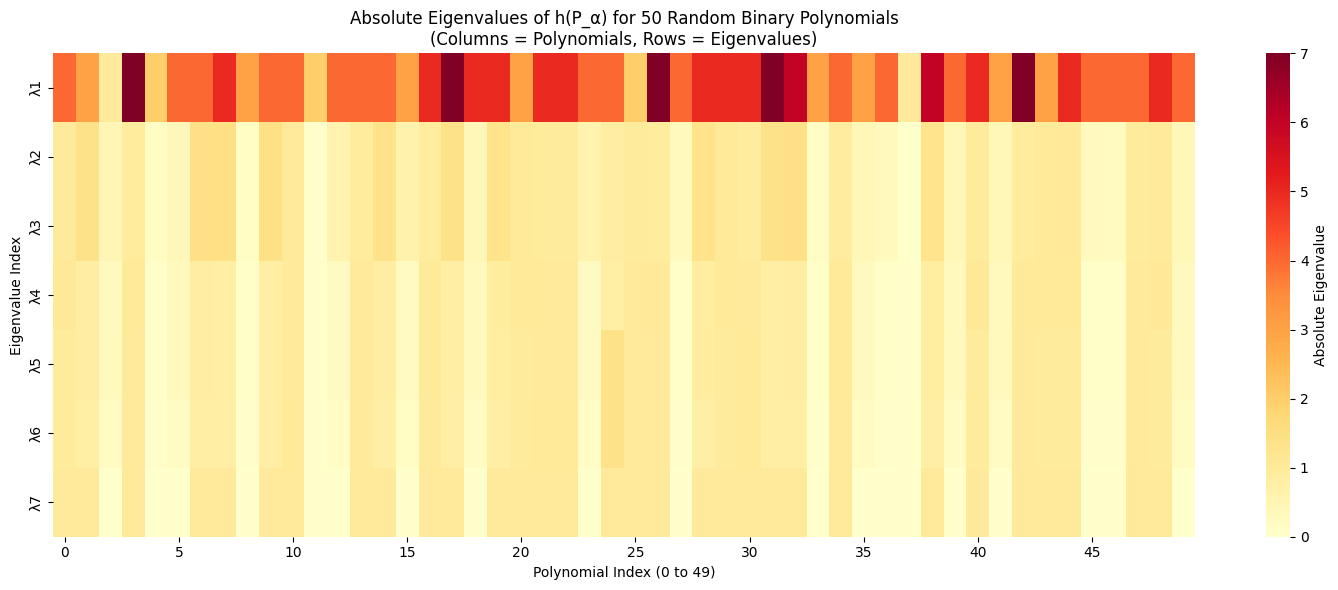

In [ ]:


# 4. Plot heatmap of absolute eigenvalues
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(
    abs_eigenvalues_matrix,
    cmap="YlOrRd",  # Yellow-Orange-Red color scale
    annot=False,     # Don't show values in cells (too dense)
    cbar_kws={'label': 'Absolute Eigenvalue'},
    yticklabels=[f"λ{i+1}" for i in range(7)],  # Eigenvalue labels (λ1 to λ6)
    xticklabels=5    # Show x-axis label every 5 polynomials
)

plt.xlabel("Polynomial Index (0 to 49)")
plt.ylabel("Eigenvalue Index")
plt.title("Absolute Eigenvalues of h(P_α) for 50 Random Binary Polynomials\n(Columns = Polynomials, Rows = Eigenvalues)")
plt.tight_layout()

# Save high-resolution image
plt.savefig("eigenvalues_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()